In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from data.data_maker import data_maker_main
from main import train, run_prediction

cuda


# Make data (one-time thing)

Run this cell to prepare the training and testing data. This only needs to be done once for one set of training and test regions.

In [3]:
TEST_REGIONS = [1]
TRAIN_REGIONS = [2, 3, 5] 

data_maker_main(TRAIN_REGIONS, TEST_REGIONS)

TRAIN Region: Region_2-5_TRAIN
TEST Region: Region_1_TEST


100%|██████████| 11428/11428 [00:03<00:00, 3784.43it/s]


# Train the model

Run this cell to train the model using the train and test data prepared in above step. If you are doing training for the first time set RESUME_EPOCH=0, if you want to resume training from previous steps set it to the previous epoch it was trained to.

To choose the model you'd like to train, change modelNo according to the index given below. Additionally, if you would like to change the number of channels the model uses, change IN_CHANNELS in config.py accordingly (6 or 7).



In [8]:
TEST_REGION = "Region_1_TEST"
TRAIN_REGION = "Region_2-2_TRAIN" # To train on all 2-5 regions, change to Region_2-5_TRAIN

NUM_EPOCHS = 3
RESUME_EPOCH = 0
modelNo = 3     
# 0: Unet
# 1: SimpleUnet
# 2: Linknet
# 3: PrithiviEncoderDecoder
# 4: Unet with EfficientNet backbone
# 5: PrithiviUnet
# 6: Segformer

train(TRAIN_REGION, TEST_REGION, NUM_EPOCHS, modelNo, RESUME_EPOCH)

100%|██████████| 666/666 [00:38<00:00, 17.28it/s]


Epoch: 1 Training Loss: 24787.73365756198
Starting Validation


100%|██████████| 130/130 [00:04<00:00, 29.94it/s]


Epoch: 1 Validation Loss: 39857.12498245239
Saving Model


100%|██████████| 666/666 [00:38<00:00, 17.08it/s]


Epoch: 2 Training Loss: 17517.17587527713
Starting Validation


100%|██████████| 130/130 [00:03<00:00, 37.29it/s]


Epoch: 2 Validation Loss: 42199.876655666645


100%|██████████| 666/666 [00:34<00:00, 19.13it/s]


Epoch: 3 Training Loss: 15658.607612266196
Starting Validation


100%|██████████| 130/130 [00:03<00:00, 41.87it/s]

Epoch: 3 Validation Loss: 39931.40259959881


# Run Inference

Run this cell to run inference on the test region based on the trained model. You need to pass RESUME_EPOCH parameter to load the trained model. This can be found by looking at the latest epoch on /saved_models/Region_X_TEST/saved_model_Y.ckpt; here Y is the RESUME_EPOCH that you would want to use.

If you want to run a pre-trained saved model, here are the instructions:
Index for models is below:

0: Unet

1: SimpleUnet

2: Linknet

3: PrithiviEncoderDecoder

4: Unet with EfficientNet backbone

5: PrithviUnet

6: Segformer


If you would like to run them, simply change RESUME_EPOCH to be the model you want in saved_models folder (as a string).

Format of the RESUME_EPOCH names for corresponding models: 'model(modelNo)Ch(input_channels)'

So for example to resume training U-Net with efficientnet backbone model with 6 input channels:
RESUME_EPOCH = 'model4Ch6'    [config.py IN_CHANNELS should be 6]

If you trained a model, it should show in saved_models as numbers (saved_model_1, saved_model_2,...). 
Simply change RESUME_EPOCH to the numbers to run inference on the trained models (and make sure modelNo matches to the trained model)

NOTE: config.py's IN_CHANNELS variable must match the Ch# in the model name for inference to work properly, you may change it accordingly
(set to 6 channels currently)

In [9]:
TEST_REGION = "Region_1_TEST"
TRAIN_REGION = "Region_2-2_TRAIN"
RESUME_EPOCH = 'model2Ch6'       
modelNo = 2  # must match ^ model no

rgb, pred, gt = run_prediction(TRAIN_REGION, TEST_REGION, RESUME_EPOCH, modelNo)

Total parameters: 28747197


100%|██████████| 259/259 [00:12<00:00, 20.61it/s]


Dry Accuracy:  80.75789421292359
Dry Precision:  99.78354702149855
Dry Recall:  41.125254826836084
Dry F-score:  58.24510243443261
Dry IOU:  0.41088599713101187


Flood Accuracy:  80.75789421292359
Flood Precision:  77.80133133216253
Flood Recall:  99.95678481577019
Flood F-score:  87.49835003738986
Flood IOU:  0.7777517046769526


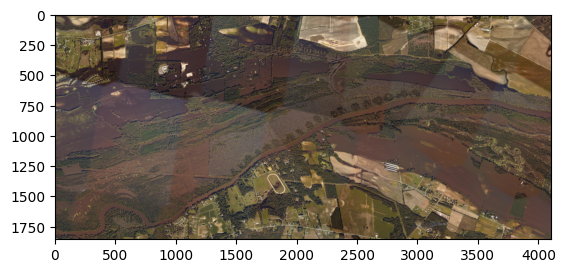

In [10]:
plt.imshow(rgb)

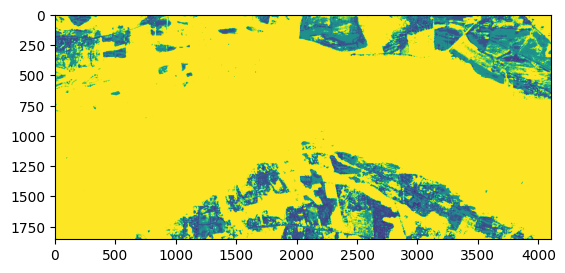

In [11]:
plt.imshow(pred)

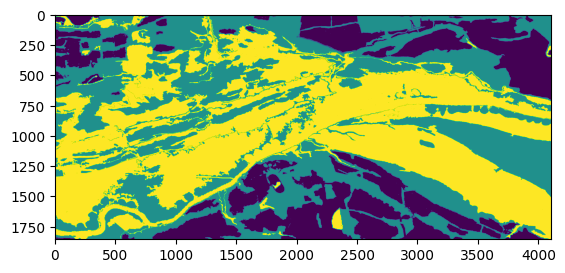

In [12]:
# Show groundtruth
plt.imshow(gt)